In [2]:
!python3 -m pip install --user sklearn
!python3 -m pip install --user seaborn
!python3 -m pip install --user folium
!python3 -m pip install --user statsmodels
!python3 -m pip install --user xlrd

In [4]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn import metrics
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import seaborn as sns

import folium
from folium.plugins import HeatMap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as sm
import math
from sklearn.preprocessing import scale

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, linalg
# Scikit learn library that implements generalized linear models
from sklearn import neighbors # provides functionality for unsupervised and supervised neighbors-based learning methods
from sklearn.metrics import mean_squared_error # Mean squared error regression loss
from sklearn import preprocessing # provides functions and classes to change raw feature vectors
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

from math import log
from sklearn import metrics

In [5]:
df_hp = pd.read_excel("house_price_beijing_raw.xlsx")

In [6]:
df_hp.describe().astype(np.int64).transpose()

,count,mean,std,min,25%,50%,75%,max
Lng,318819,116,0,116,116,116,116,116
Lat,318819,39,0,39,39,39,40,40
Cid,318819,1129115149323,2363565416584,1111027373683,1111027376255,1111027378407,1111027380579,1114619720585020
tradeYear,318819,2014,1,2002,2013,2015,2016,2018
tradeMonth,318819,6,3,1,3,7,10,12
tradeDay,318819,16,8,1,9,17,24,31
DOM,160849,28,50,1,1,6,37,1677
followers,318819,16,34,0,0,5,18,1143
totalPrice,318819,349,230,0,205,294,425,18130
price,318819,43533,21708,1,28052,38738,53821,156250


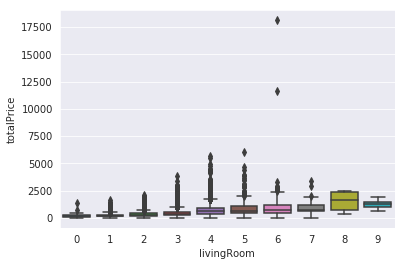

In [5]:
sns.set_style('darkgrid')

sns.boxplot(data = df_hp, x = 'livingRoom', y = 'totalPrice')

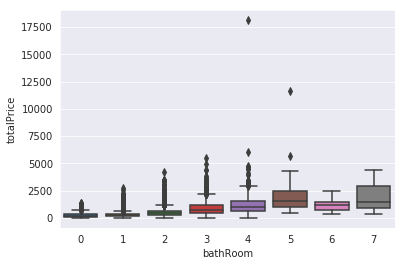

In [49]:
sns.set_style('darkgrid')

sns.boxplot(data = df_hp, x = 'bathRoom', y = 'totalPrice')

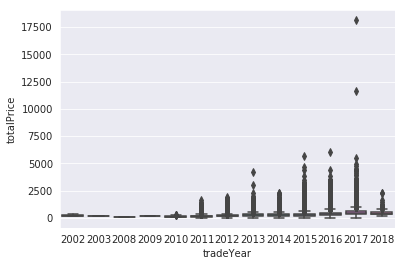

In [7]:
sns.set_style('darkgrid')

sns.boxplot(data = df_hp, x = 'tradeYear', y = 'totalPrice')

In [9]:
df_hp.head(20)

,url,id,Lng,Lat,Cid,tradeYear,tradeMonth,tradeDay,DOM,followers,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101100261039....,101100261039,116.291921,40.146327,1111043196439,2016,8,31,60.0,1,...,NaN,2011.0,2,6,1.000,0,0,0,6,48793.0
1,https://bj.lianjia.com/chengjiao/BJCY90300669....,BJCY90300669,116.437966,40.018379,1111027382232,2016,3,8,1.0,14,...,NaN,2011.0,4,6,1.000,1,1,0,7,114246.0
2,https://bj.lianjia.com/chengjiao/BJHD89553835....,BJHD89553835,116.287746,40.038617,1111027381142,2015,7,20,NaN,2,...,4.0,2009.0,2,6,0.250,1,0,1,8,92027.0
3,https://bj.lianjia.com/chengjiao/101091290951....,101091290951,116.455694,39.807011,1111027381865,2016,6,16,169.0,36,...,4.0,2002.0,3,6,0.500,0,1,0,4,45246.0
4,https://bj.lianjia.com/chengjiao/101091727210....,101091727210,116.275500,40.036213,1111027376136,2017,1,19,316.0,43,...,NaN,2003.0,4,6,0.500,0,1,1,8,74522.0
5,https://bj.lianjia.com/chengjiao/101092021194....,101092021194,116.317097,39.632299,1111027374277,2016,7,27,100.0,8,...,NaN,2011.0,1,5,1.000,0,0,0,4,31106.0
6,https://bj.lianjia.com/chengjiao/101100413508....,101100413508,116.542335,39.754708,1111027379800,2017,2,8,184.0,37,...,NaN,2008.0,4,5,1.000,0,1,0,3,32802.0
7,https://bj.lianjia.com/chengjiao/101100885924....,101100885924,116.419190,40.150537,1111047627815,2016,12,31,36.0,0,...,NaN,NaN,2,1,1.000,0,0,0,6,29153.0
8,https://bj.lianjia.com/chengjiao/101101119398....,101101119398,116.543161,40.097129,1111041170735,2017,2,7,2.0,10,...,4.0,2013.0,3,6,1.000,1,0,0,13,58692.0
9,https://bj.lianjia.com/chengjiao/BJCP00382717....,BJCP00382717,116.303615,40.090880,1111027377758,2012,12,24,NaN,0,...,NaN,2003.0,1,4,0.500,0,0,0,6,56117.0


In [10]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318819 entries, 0 to 318818
Data columns (total 28 columns):
url                    318819 non-null object
id                     318819 non-null object
Lng                    318819 non-null float64
Lat                    318819 non-null float64
Cid                    318819 non-null int64
tradeYear              318819 non-null int64
tradeMonth             318819 non-null int64
tradeDay               318819 non-null int64
DOM                    160849 non-null float64
followers              318819 non-null int64
totalPrice             318819 non-null float64
price                  318819 non-null int64
square                 318819 non-null float64
livingRoom             318819 non-null int64
drawingRoom            318819 non-null int64
kitchen                318819 non-null int64
bathRoom               318819 non-null int64
floor                  318819 non-null int64
buildingType           316798 non-null float64
constructionTime    

In [11]:
df_hp.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
url,318819,318819,https://bj.lianjia.com/chengjiao/BJCY89582539....,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,318819,318819,1.01101e+11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lng,318819,NaN,NaN,NaN,116.418,0.112031,116.073,116.345,116.417,116.478,116.732
Lat,318819,NaN,NaN,NaN,39.9496,0.0919851,39.627,39.8932,39.9345,40.003,40.2528
Cid,318819,NaN,NaN,NaN,1.12912e+12,2.36357e+12,1.11103e+12,1.11103e+12,1.11103e+12,1.11103e+12,1.11462e+15
tradeYear,318819,NaN,NaN,NaN,2014.78,1.65627,2002,2013,2015,2016,2018
tradeMonth,318819,NaN,NaN,NaN,6.61172,3.48255,1,3,7,10,12
tradeDay,318819,NaN,NaN,NaN,16.5294,8.74119,1,9,17,24,31
DOM,160849,NaN,NaN,NaN,28.8267,50.24,1,1,6,37,1677
followers,318819,NaN,NaN,NaN,16.7332,34.2105,0,0,5,18,1143


In [13]:
df_hp.columns.values

array(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeYear', 'tradeMonth',
       'tradeDay', 'DOM', 'followers', 'totalPrice', 'price', 'square',
       'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor',
       'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype=object)

In [14]:
array = df_hp.values
X = array[:,2:28]
Y = array[:,11]

In [15]:
df_hp["kitchen"].describe()

count    318819.000000
mean          0.994338
std           0.106185
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: kitchen, dtype: float64

In [16]:
df_hp.isnull().sum()

url                         0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeYear                   0
tradeMonth                  0
tradeDay                    0
DOM                    157970
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2021
constructionTime        19283
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                    0
fiveYearsProperty           0
subway                      0
district                    0
communityAverage          463
dtype: int64

In [16]:
df_hp["DOM"].fillna(df_hp["DOM"].mean(), inplace = True)
df_hp.isnull().sum()

url                    0
id                     0
Lng                    0
Lat                    0
Cid                    0
tradeYear              0
tradeMonth             0
tradeDay               0
DOM                    0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
tradeTime              0
dtype: int64

In [17]:
df_hp.dropna(inplace=True)
df_hp.isnull().sum()

url                    0
id                     0
Lng                    0
Lat                    0
Cid                    0
tradeYear              0
tradeMonth             0
tradeDay               0
DOM                    0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
tradeTime              0
dtype: int64

Text(0.5,1,'Distribution of number of the total price')

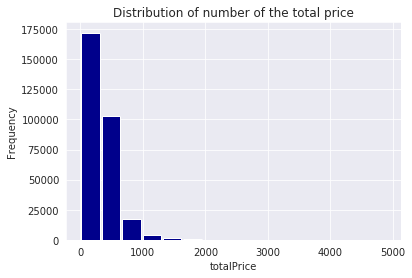

In [19]:
#visualization 1
df_hp["totalPrice"].plot.hist(grid=True, bins=15, rwidth=0.9, color='darkblue')
plt.xlabel('totalPrice')
plt.ylabel('Frequency')
plt.title('Distribution of number of the total price')

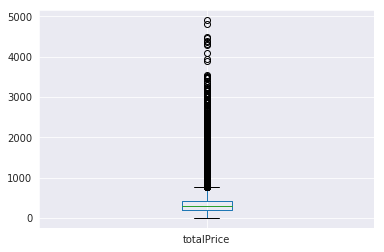

In [20]:
#visualization 3
df_hp.boxplot(column='totalPrice')

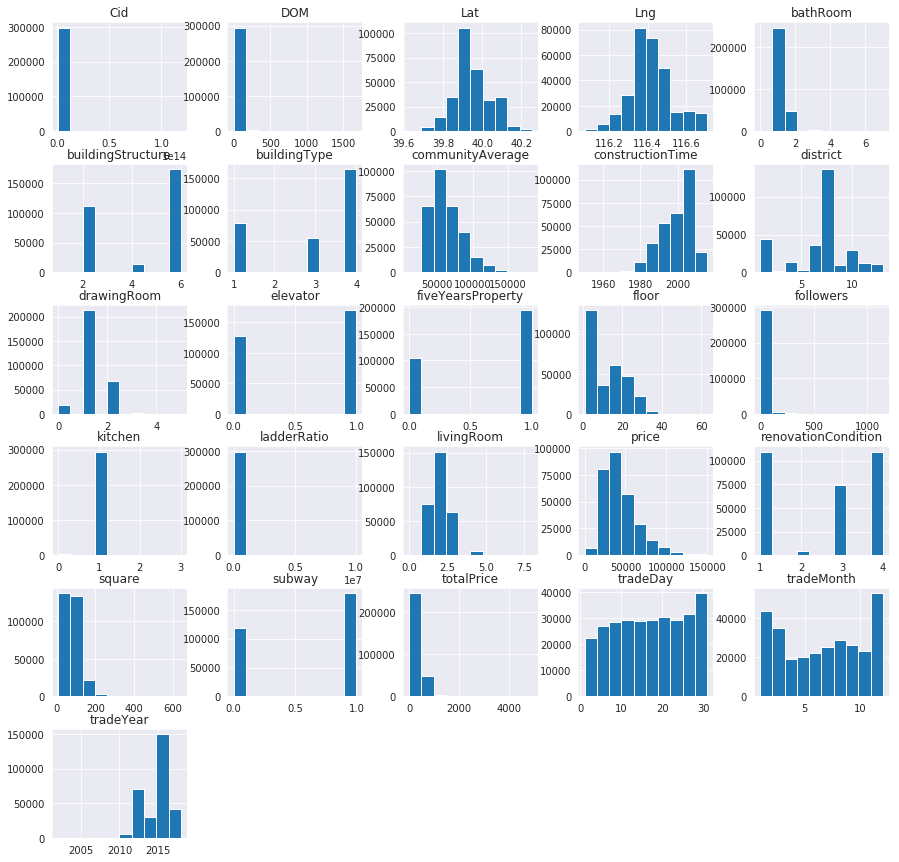

In [21]:
#visualization 4
df_hp.select_dtypes(include=['int64']).columns
df_hp.hist(figsize=(15,15))
plt.show()

Text(0,0.5,'mean of house price')

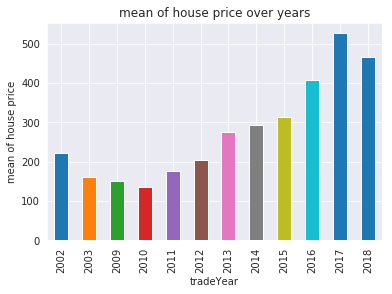

In [22]:
#visualization 5
df_hp_year = df_hp.groupby(['tradeYear'])['totalPrice'].mean()
df_hp_year
df_hp_year.plot.bar()
plt.title('mean of house price over years')
plt.ylabel('mean of house price')

In [23]:
df_hp.describe().astype(np.int64)

,Lng,Lat,Cid,tradeYear,tradeMonth,tradeDay,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,297701,297701,297701,297701,297701,297701,297701,297701,297701,297701,...,297701,297701,297701,297701,297701,297701,297701,297701,297701,297701
mean,116,39,1126267581784,2014,6,16,29,17,349,43820,...,3,1999,2,4,67,0,0,0,6,63688
std,0,0,1331388340180,1,3,8,36,34,224,21789,...,1,8,1,1,25943,0,0,0,2,22167
min,116,39,1111027373683,2002,1,1,1,0,0,1,...,1,1950,1,1,0,0,0,0,1,10847
25%,116,39,1111027376247,2013,3,9,7,0,205,28224,...,1,1994,1,2,0,0,0,0,6,46505
50%,116,39,1111027378407,2015,7,17,28,5,295,39033,...,4,2001,3,6,0,1,1,1,7,59025
75%,116,40,1111027380579,2016,10,24,28,19,427,54249,...,4,2006,4,6,0,1,1,1,8,75858
max,116,40,118486728773575,2018,12,31,1677,1143,4900,150000,...,4,2016,4,6,10009400,1,1,1,13,183109


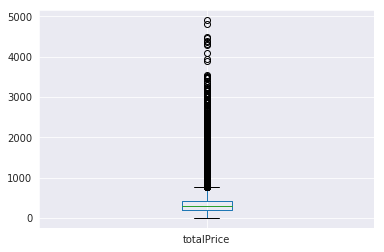

In [24]:
df_hp.boxplot(column='totalPrice')

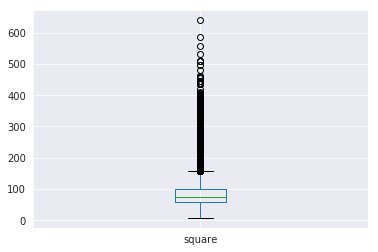

In [25]:
df_hp.boxplot(column='square')

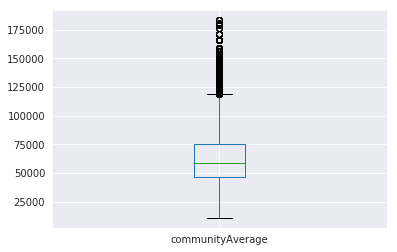

In [35]:
df_hp.boxplot(column='communityAverage')

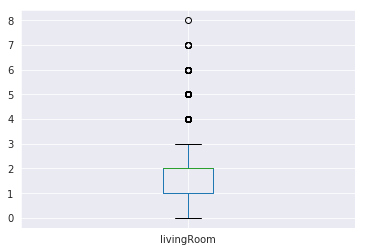

In [36]:
df_hp.boxplot(column='livingRoom')

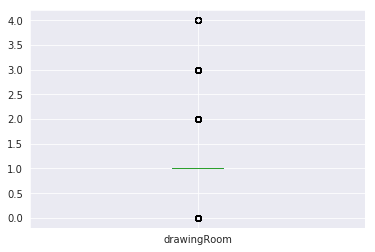

In [37]:
df_hp.boxplot(column='drawingRoom')

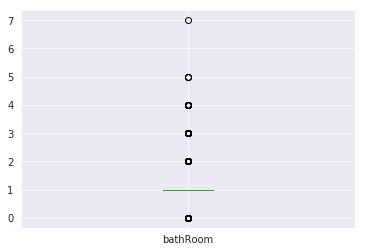

In [38]:
df_hp.boxplot(column='bathRoom')

In [18]:
df_hp.info()
df_hp = df_hp[np.abs(df_hp.totalPrice - df_hp.totalPrice.mean()) <= (3*df_hp.totalPrice.std())]
df_hp = df_hp[np.abs(df_hp.square - df_hp.square.mean()) <= (3*df_hp.square.std())]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282547 entries, 2 to 318818
Data columns (total 29 columns):
url                    282547 non-null object
id                     282547 non-null object
Lng                    282547 non-null float64
Lat                    282547 non-null float64
Cid                    282547 non-null int64
tradeYear              282547 non-null int64
tradeMonth             282547 non-null int64
tradeDay               282547 non-null int64
DOM                    282547 non-null float64
followers              282547 non-null int64
totalPrice             282547 non-null float64
price                  282547 non-null int64
square                 282547 non-null float64
livingRoom             282547 non-null int64
drawingRoom            282547 non-null int64
kitchen                282547 non-null int64
bathRoom               282547 non-null int64
floor                  282547 non-null int64
buildingType           282547 non-null float64
constructionTime    

In [19]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279182 entries, 2 to 318818
Data columns (total 29 columns):
url                    279182 non-null object
id                     279182 non-null object
Lng                    279182 non-null float64
Lat                    279182 non-null float64
Cid                    279182 non-null int64
tradeYear              279182 non-null int64
tradeMonth             279182 non-null int64
tradeDay               279182 non-null int64
DOM                    279182 non-null float64
followers              279182 non-null int64
totalPrice             279182 non-null float64
price                  279182 non-null int64
square                 279182 non-null float64
livingRoom             279182 non-null int64
drawingRoom            279182 non-null int64
kitchen                279182 non-null int64
bathRoom               279182 non-null int64
floor                  279182 non-null int64
buildingType           279182 non-null float64
constructionTime    

In [12]:
hp0 = df_hp
hp0["tradeTime"] = hp0["tradeYear"].map(str)+'/' + hp0["tradeMonth"].map(str) + '/' +hp0["tradeDay"].map(str)
hp0['tradeTime']

2          2015/7/20
17        2016/10/22
64          2013/9/9
66        2014/10/19
119        2016/7/29
130        2016/9/27
143         2016/9/2
232        2017/3/11
236        2017/2/20
246        2017/3/14
251        2017/6/30
312         2015/5/1
325        2016/1/14
397        2014/2/17
428        2015/6/17
440        2016/2/27
460        2016/5/15
484         2016/3/6
489         2013/5/8
490        2013/8/25
501        2016/3/18
502         2016/6/9
531         2012/8/8
532         2012/8/8
536        2013/10/8
537        2013/10/8
545         2016/2/1
551         2016/5/7
552         2016/5/7
574        2016/8/10
             ...    
318742     2015/1/10
318745      2015/2/9
318746     2014/7/26
318747     2014/7/26
318751     2015/4/25
318754      2015/1/7
318755      2015/1/7
318758     2015/3/22
318759      2015/4/7
318763     2015/4/18
318766     2015/7/12
318772     2015/8/11
318779      2016/1/8
318780    2015/11/28
318781    2015/11/27
318783    2015/11/26
318785    201

In [20]:
df_hp_sub = df_hp
df_hp_sub = df_hp_sub.drop(['id', 'url','kitchen', 'price', 'tradeTime'], axis = 1)
df_hp_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279182 entries, 2 to 318818
Data columns (total 24 columns):
Lng                    279182 non-null float64
Lat                    279182 non-null float64
Cid                    279182 non-null int64
tradeYear              279182 non-null int64
tradeMonth             279182 non-null int64
tradeDay               279182 non-null int64
DOM                    279182 non-null float64
followers              279182 non-null int64
totalPrice             279182 non-null float64
square                 279182 non-null float64
livingRoom             279182 non-null int64
drawingRoom            279182 non-null int64
bathRoom               279182 non-null int64
floor                  279182 non-null int64
buildingType           279182 non-null float64
constructionTime       279182 non-null float64
renovationCondition    279182 non-null int64
buildingStructure      279182 non-null int64
ladderRatio            279182 non-null float64
elevator          

In [21]:
Y = df_hp_sub['totalPrice'] 
X = df_hp_sub
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(score_func=f_classif , k=10)


fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))

                  Specs      Score
8            totalPrice        inf
3             tradeYear  23.136224
9                square  14.981584
23     communityAverage  14.715597
10           livingRoom  10.813203
16  renovationCondition   8.730683
12             bathRoom   5.998941
11          drawingRoom   5.950216
7             followers   3.903900
19             elevator   3.258717
6                   DOM   2.915847
17    buildingStructure   2.901443
13                floor   2.899955
21               subway   2.310877
0                   Lng   2.033627
20    fiveYearsProperty   1.890300
2                   Cid   1.847147
1                   Lat   1.711514
14         buildingType   1.564537
18          ladderRatio   1.527186


In [33]:
def season(tradeMonth):
    if tradeMonth < 4:
        return 'winter'
    elif tradeMonth < 7:
        return 'spring'
    elif tradeMonth < 10:
        return 'summer'
    else:
        return 'autumn'
df_hp_sub.loc[:, 'season'] = df_hp_sub['tradeMonth'].apply(season)
df_hp_sub[['season','tradeMonth']]

,season,tradeMonth
2,summer,7
3,spring,6
8,winter,2
10,spring,5
11,winter,2
12,summer,8
13,summer,9
14,summer,7
16,spring,6
17,autumn,10


In [34]:
data1 = pd.read_excel("house_price_beijing_1.xlsx")
data2 = pd.read_excel("house_price_beijing_2.xlsx")
dataset = data1.append(data2) 

export_csv = dataset.to_csv (r'Newdata.csv', index = None, header=True)
final_set = pd.read_csv("Newdata.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'house_price_beijing_1.xlsx'

In [35]:
final_set.info()

NameError: name 'final_set' is not defined

Text(0,0.5,'count')

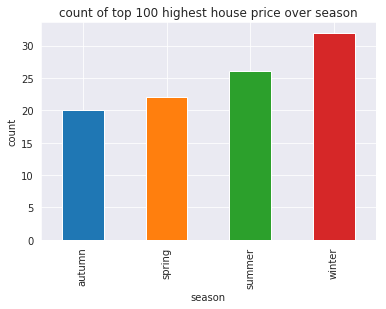

In [36]:
sort = df_hp_sub.sort_values(by='totalPrice', ascending=False).head(100)
sort.groupby(['season'])['totalPrice'].count().plot.bar()
plt.title('count of top 100 highest house price over season')
plt.xlabel('season')
plt.ylabel('count')

In [8]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('simple_linear_regression').getOrCreate()
from pyspark.ml.regression import LinearRegression

In [9]:
df_hp_sub_spark1 = spark.createDataFrame(df_hp_sub)

In [29]:
df_hp_sub_spark1.printSchema()

root
 |-- Lng: double (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Cid: long (nullable = true)
 |-- tradeYear: long (nullable = true)
 |-- tradeMonth: long (nullable = true)
 |-- tradeDay: long (nullable = true)
 |-- DOM: double (nullable = true)
 |-- followers: long (nullable = true)
 |-- totalPrice: double (nullable = true)
 |-- square: double (nullable = true)
 |-- livingRoom: long (nullable = true)
 |-- drawingRoom: long (nullable = true)
 |-- bathRoom: long (nullable = true)
 |-- floor: long (nullable = true)
 |-- buildingType: double (nullable = true)
 |-- constructionTime: double (nullable = true)
 |-- renovationCondition: long (nullable = true)
 |-- buildingStructure: long (nullable = true)
 |-- ladderRatio: double (nullable = true)
 |-- elevator: long (nullable = true)
 |-- fiveYearsProperty: long (nullable = true)
 |-- subway: long (nullable = true)
 |-- district: long (nullable = true)
 |-- communityAverage: double (nullable = true)



In [11]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [12]:
assembler = VectorAssembler(
    inputCols=["square"],
    outputCol="features")

In [14]:
output1 = assembler.transform(df_hp_sub_spark1)

In [16]:
final_data1 = output1.select("features",'totalPrice')
final_data1.show()

+--------+----------+
|features|totalPrice|
+--------+----------+
| [78.97]|     380.0|
| [155.0]|     808.0|
|[154.89]|     720.0|
|[179.17]|     455.0|
|[177.95]|     500.0|
| [107.0]|     320.0|
|  [93.0]|     580.0|
|[147.75]|     560.0|
| [178.6]|     890.0|
| [150.0]|     770.0|
|[118.32]|     928.0|
|[150.16]|     330.0|
|[164.41]|     335.0|
|[143.13]|     876.0|
| [69.27]|     159.0|
|[144.35]|     966.0|
|[137.18]|     630.0|
|[144.44]|     520.0|
|[178.05]|     415.0|
| [160.5]|     640.0|
+--------+----------+
only showing top 20 rows



In [18]:
train_data,test_data = final_data1.randomSplit([0.8,0.2])

In [19]:
lr1 = LinearRegression(labelCol='totalPrice')

In [21]:
lrModel1 = lr1.fit(train_data)

In [24]:
print("Coefficients: {} Intercept: {}".format(lrModel1.coefficients,lrModel1.intercept))

Coefficients: [2.6335025836068753] Intercept: 119.12450465069814


In [25]:
test_results = lrModel1.evaluate(test_data)

In [28]:
# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME: {}".format(test_results.rootMeanSquaredError))

RSME: 153.8254690380151


In [27]:
# We can also get the R2 value. 
print("R2: {}".format(test_results.r2))

R2: 0.20626848334005365


In [10]:
# Section must be included at the beginning of each new notebook. Remember to change the app name. 
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('multiple_linear_regression2').getOrCreate()
from pyspark.ml.regression import LinearRegression

In [11]:
df_hp_sub_spark3 = spark.createDataFrame(df_hp_sub)

In [12]:
df_hp_sub_spark3.printSchema()
df_hp_sub_spark3.head()

root
 |-- Lng: double (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Cid: long (nullable = true)
 |-- tradeYear: long (nullable = true)
 |-- tradeMonth: long (nullable = true)
 |-- tradeDay: long (nullable = true)
 |-- DOM: double (nullable = true)
 |-- followers: long (nullable = true)
 |-- totalPrice: double (nullable = true)
 |-- square: double (nullable = true)
 |-- livingRoom: long (nullable = true)
 |-- drawingRoom: long (nullable = true)
 |-- bathRoom: long (nullable = true)
 |-- floor: long (nullable = true)
 |-- buildingType: double (nullable = true)
 |-- constructionTime: double (nullable = true)
 |-- renovationCondition: long (nullable = true)
 |-- buildingStructure: long (nullable = true)
 |-- ladderRatio: double (nullable = true)
 |-- elevator: long (nullable = true)
 |-- fiveYearsProperty: long (nullable = true)
 |-- subway: long (nullable = true)
 |-- district: long (nullable = true)
 |-- communityAverage: double (nullable = true)



Row(Lng=116.287746, Lat=40.038617, Cid=1111027381142, tradeYear=2015, tradeMonth=7, tradeDay=20, DOM=28.826663516714433, followers=2, totalPrice=380.0, square=78.97, livingRoom=2, drawingRoom=1, bathRoom=7, floor=6, buildingType=4.0, constructionTime=2009.0, renovationCondition=2, buildingStructure=6, ladderRatio=0.25, elevator=1, fiveYearsProperty=0, subway=1, district=8, communityAverage=92027.0)

In [13]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(
    inputCols=['Lng','Lat','Cid','tradeYear','tradeMonth',
            'tradeDay','DOM','followers','square','livingRoom',
            'drawingRoom','bathRoom','floor','buildingType','constructionTime','renovationCondition',
            'buildingStructure','ladderRatio','elevator','fiveYearsProperty','subway','district','communityAverage'],
    outputCol="features")

In [14]:
output3 = assembler.transform(df_hp_sub_spark3)

In [15]:
final_data3 = output3.select("features",'totalPrice')
final_data3.show()

+--------------------+----------+
|            features|totalPrice|
+--------------------+----------+
|[116.287746,40.03...|     380.0|
|[116.497474,39.81...|     808.0|
|[116.497474,39.81...|     720.0|
|[116.341774,39.83...|     455.0|
|[116.689177,39.93...|     500.0|
|[116.43801,40.076...|     320.0|
|[116.368564,40.08...|     580.0|
|[116.432684,40.07...|     560.0|
|[116.341774,39.83...|     890.0|
|[116.665923,40.18...|     770.0|
|[116.476546,39.90...|     928.0|
|[116.432684,40.07...|     330.0|
|[116.432684,40.07...|     335.0|
|[116.529466,39.92...|     876.0|
|[116.411947,40.04...|     159.0|
|[116.529205,39.92...|     966.0|
|[116.605975,39.93...|     630.0|
|[116.458721,39.81...|     520.0|
|[116.341774,39.83...|     415.0|
|[116.424963,39.84...|     640.0|
+--------------------+----------+
only showing top 20 rows



In [17]:
train_data,test_data = final_data3.randomSplit([0.8,0.2])

In [18]:
lr3 = LinearRegression(labelCol='totalPrice')

In [19]:
lrModel3 = lr3.fit(train_data)

In [20]:
print("Coefficients: {} Intercept: {}".format(lrModel3.coefficients,lrModel3.intercept))

Coefficients: [-12.690242114218403,-7.112681262839649,-1.9959723973118462e-13,56.92683859108817,3.4960619970393543,0.23537212378903546,0.23829550149500547,0.08968015952296188,3.3506362729817867,9.412892708165774,10.04562320689322,-14.341173848145933,0.49628422215164963,3.425815379357237,-0.04103378642962282,-11.129555377749956,4.873617723187309,4.732028692454843e-06,2.3674372466695015,-4.981285054266385,6.342550446157794,-0.5619944460311299,0.004578896096213618] Intercept: -113135.48201560353


In [21]:
test_results = lrModel3.evaluate(test_data)

In [22]:
# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME: {}".format(test_results.rootMeanSquaredError))

RSME: 80.28322982524178


In [23]:
# We can also get the R2 value. 
print("R2: {}".format(test_results.r2))

R2: 0.7822772294977455


In [24]:
# Section must be included at the beginning of each new notebook. Remember to change the app name. 
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Mutiple_linear_regression1').getOrCreate()
from pyspark.ml.regression import LinearRegression

In [25]:
df_hp_sub_spark2 = spark.createDataFrame(df_hp_sub)

In [26]:
df_hp_sub_spark2.printSchema()
df_hp_sub_spark2.head()

root
 |-- Lng: double (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Cid: long (nullable = true)
 |-- tradeYear: long (nullable = true)
 |-- tradeMonth: long (nullable = true)
 |-- tradeDay: long (nullable = true)
 |-- DOM: double (nullable = true)
 |-- followers: long (nullable = true)
 |-- totalPrice: double (nullable = true)
 |-- square: double (nullable = true)
 |-- livingRoom: long (nullable = true)
 |-- drawingRoom: long (nullable = true)
 |-- bathRoom: long (nullable = true)
 |-- floor: long (nullable = true)
 |-- buildingType: double (nullable = true)
 |-- constructionTime: double (nullable = true)
 |-- renovationCondition: long (nullable = true)
 |-- buildingStructure: long (nullable = true)
 |-- ladderRatio: double (nullable = true)
 |-- elevator: long (nullable = true)
 |-- fiveYearsProperty: long (nullable = true)
 |-- subway: long (nullable = true)
 |-- district: long (nullable = true)
 |-- communityAverage: double (nullable = true)



Row(Lng=116.287746, Lat=40.038617, Cid=1111027381142, tradeYear=2015, tradeMonth=7, tradeDay=20, DOM=28.826663516714433, followers=2, totalPrice=380.0, square=78.97, livingRoom=2, drawingRoom=1, bathRoom=7, floor=6, buildingType=4.0, constructionTime=2009.0, renovationCondition=2, buildingStructure=6, ladderRatio=0.25, elevator=1, fiveYearsProperty=0, subway=1, district=8, communityAverage=92027.0)

In [27]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [28]:
assembler = VectorAssembler(
    inputCols=["tradeYear", "communityAverage", 
               "livingRoom","square", "renovationCondition", "bathRoom", "drawingRoom"],
    outputCol="features")

In [29]:
output2 = assembler.transform(df_hp_sub_spark2)

In [30]:
final_data2 = output2.select("features",'totalPrice')
final_data2.show()

+--------------------+----------+
|            features|totalPrice|
+--------------------+----------+
|[2015.0,92027.0,2...|     380.0|
|[2016.0,54282.0,5...|     808.0|
|[2013.0,54282.0,4...|     720.0|
|[2014.0,45920.0,6...|     455.0|
|[2016.0,58577.0,6...|     500.0|
|[2016.0,51238.0,6...|     320.0|
|[2016.0,58311.0,5...|     580.0|
|[2017.0,38384.0,5...|     560.0|
|[2017.0,45920.0,4...|     890.0|
|[2017.0,43947.0,5...|     770.0|
|[2017.0,72269.0,2...|     928.0|
|[2015.0,38384.0,3...|     330.0|
|[2016.0,38384.0,3...|     335.0|
|[2014.0,83321.0,3...|     876.0|
|[2015.0,72148.0,3...|     159.0|
|[2016.0,77473.0,3...|     966.0|
|[2016.0,69200.0,6...|     630.0|
|[2016.0,46635.0,4...|     520.0|
|[2013.0,45920.0,4...|     415.0|
|[2013.0,54824.0,4...|     640.0|
+--------------------+----------+
only showing top 20 rows



In [31]:
train_data,test_data = final_data2.randomSplit([0.8,0.2])

In [32]:
lr2 = LinearRegression(labelCol='totalPrice')

In [33]:
lrModel2 = lr2.fit(train_data)

In [34]:
print("Coefficients: {} Intercept: {}".format(lrModel2.coefficients,lrModel2.intercept))

Coefficients: [57.014249389013884,0.004691425379582296,3.3070806607078804,3.5405561646236103,-9.701204069020763,-13.992301612693781,7.213280673825053] Intercept: -115094.68970531736


In [35]:
test_results = lrModel2.evaluate(test_data)

In [36]:
# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME: {}".format(test_results.rootMeanSquaredError))

RSME: 82.4602099397373


In [37]:
# We can also get the R2 value. 
print("R2: {}".format(test_results.r2))

R2: 0.7700821747335407


In [64]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('random_forest1').getOrCreate()

In [65]:
df_hp_sub_spark4 = spark.createDataFrame(df_hp_sub)

In [66]:
# A few things we need to do before Spark can accept the data!
# It needs to be in the form of two columns: "label" and "features".Q
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [67]:
# Combine all features into one vector named features.
assembler = VectorAssembler(
  inputCols=['Lng','Lat','Cid','tradeYear','tradeMonth',
            'tradeDay','DOM','followers','square','livingRoom',
            'drawingRoom','bathRoom','floor','buildingType','constructionTime','renovationCondition',
            'buildingStructure','ladderRatio','elevator','fiveYearsProperty','subway','district','communityAverage'],
              outputCol="features")

In [68]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline

In [69]:
rf = RandomForestRegressor(labelCol="totalPrice",featuresCol='features', numTrees = 200)

In [70]:
pipeline = Pipeline(stages=[assembler, rf])

In [71]:
train_data,test_data = df_hp_sub_spark4.randomSplit([0.8,0.2])

In [72]:
rf_model = pipeline.fit(train_data)

# Make predictions.
predictions = rf_model.transform(test_data)

# Select example rows to display.
predictions.select("prediction", "totalPrice", "features").show(5)



+------------------+----------+--------------------+
|        prediction|totalPrice|            features|
+------------------+----------+--------------------+
| 454.3510250603976|     355.0|[116.072514,39.67...|
|254.02070919935616|     177.0|[116.111318,39.94...|
|260.35636725822957|     213.0|[116.111318,39.94...|
| 239.1024128819666|     217.0|[116.111318,39.94...|
| 265.9668776886717|     260.0|[116.111318,39.94...|
+------------------+----------+--------------------+
only showing top 5 rows



In [79]:
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt

evaluator1 = RegressionEvaluator(labelCol="totalPrice", predictionCol="prediction", metricName="rmse")

rmse = evaluator1.evaluate(predictions)
rmse



76.48971189918396

In [80]:
evaluator2 = RegressionEvaluator(labelCol="totalPrice", predictionCol="prediction", metricName="r2")
r2 = evaluator2.evaluate(predictions)
r2

0.7373148991952472

Text(0,0.5,'price')

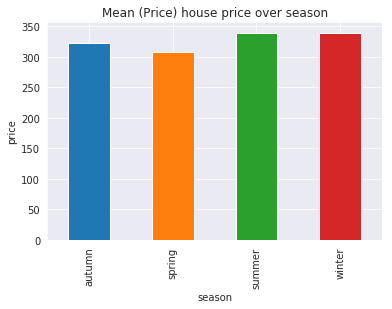

In [68]:
sort = df_hp_sub.sort_values(by='totalPrice', ascending=False)
sort.groupby(['season'])['totalPrice'].mean().plot.bar()
plt.title('Mean (Price) house price over season')
plt.xlabel('season')
plt.ylabel('price')

Text(0,0.5,'count')

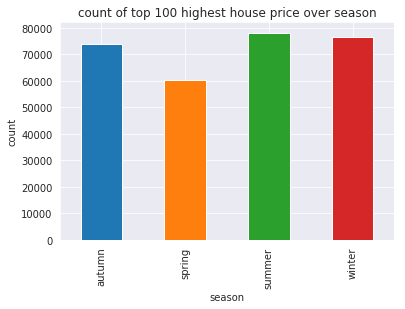

In [69]:
sort = df_hp_sub.sort_values(by='totalPrice', ascending=False)
sort.groupby(['season'])['totalPrice'].count().plot.bar()
plt.title('count of top 100 highest house price over season')
plt.xlabel('season')
plt.ylabel('count')

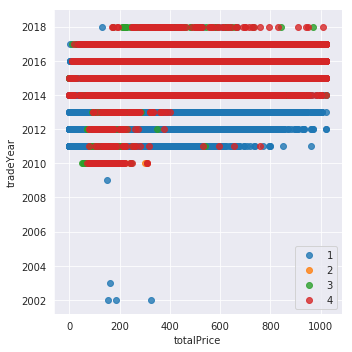

In [70]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="totalPrice", y="tradeYear", data=df_hp_sub, fit_reg=False, hue='renovationCondition', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

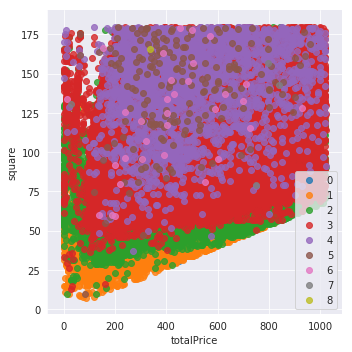

In [71]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="totalPrice", y="square", data=df_hp_sub, fit_reg=False, hue='livingRoom', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

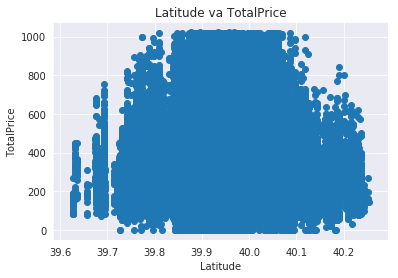

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [72]:
plt.scatter(df_hp_sub.Lat, df_hp_sub.totalPrice)
plt.title("Latitude va TotalPrice")
plt.xlabel('Latitude')
plt.ylabel('TotalPrice')
plt.show()
sns.despine

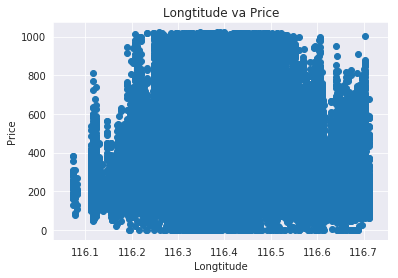

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [73]:
plt.scatter(df_hp_sub.Lng, df_hp_sub.totalPrice)
plt.title("Longtitude va Price")
plt.xlabel('Longtitude')
plt.ylabel('Price')
plt.show()
sns.despine

In [75]:
# find the row of the house which has the highest totalPrice
maxpr = df_hp_sub.loc[df_hp_sub['totalPrice'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[40.146327, 116.291921], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_hp_sub_copy = df_hp_sub.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98001].copy()
df_hp_sub_copy['count'] = 1
basemap = generateBaseMap()

# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest totalPrice
folium.Marker([maxpr['Lat'], maxpr['Lng']],popup='Highest TotalPrice: $'+str(format(maxpr['totalPrice'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_hp_sub_copy[['Lat','Lng','count']].groupby(['Lat','Lng']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap


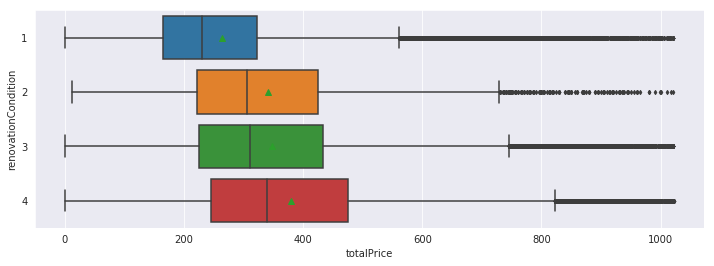

point biserial correLation r between totalPrice and presence_of_renovation is 0.29307604824092715 with p = 0.0


In [76]:
from scipy import stats, linalg
#variable 'renovationCondition'
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'renovationCondition', x = 'totalPrice', data = df_hp_sub,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
print ('')
plt.show()
r, p = stats.pointbiserialr(df_hp_sub['renovationCondition'], df_hp_sub['totalPrice'])
print ('point biserial correLation r between totalPrice and presence_of_renovation is %s with p = %s' %(r,p))


No handles with labels found to put in legend.


Text(-2.45,0.5,'count')

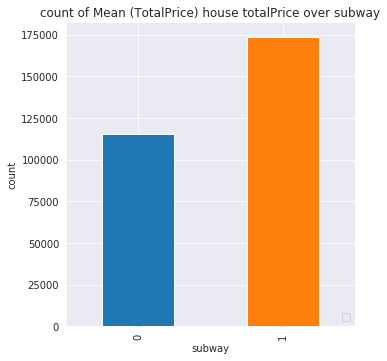

In [78]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="subway", y="totalPrice", data=df_hp_sub, fit_reg=False, legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')


sort = df_hp_sub.sort_values(by='totalPrice', ascending=False)
sort.groupby(['subway'])['totalPrice'].count().plot.bar()
plt.title('count of Mean (TotalPrice) house totalPrice over subway')
plt.xlabel('subway')
plt.ylabel('count')

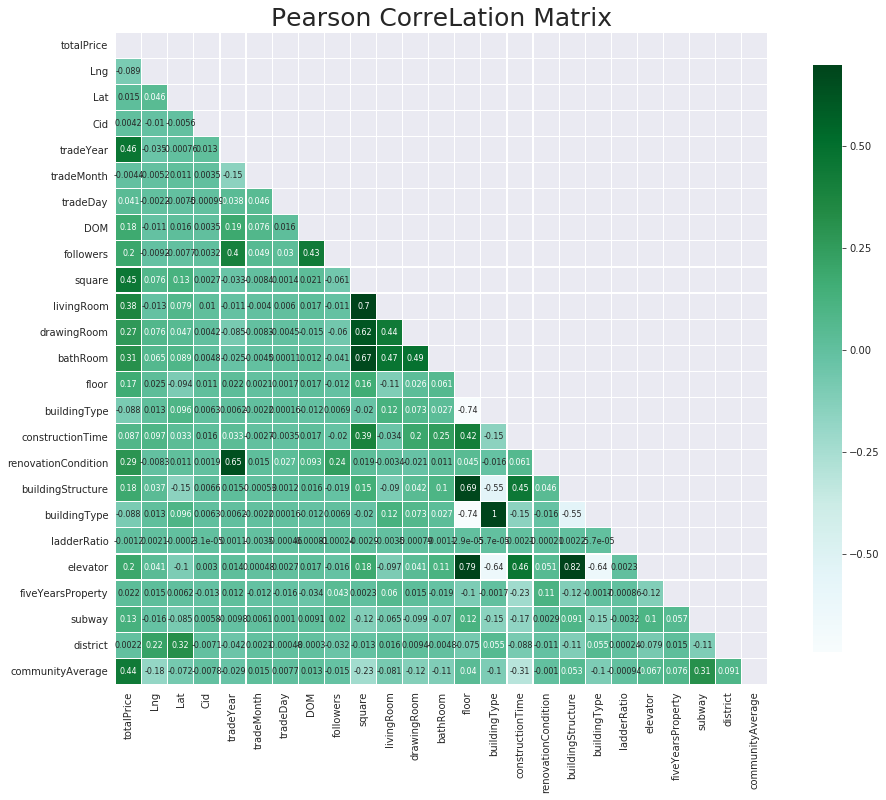

In [79]:
features = ['totalPrice','Lng','Lat','Cid','tradeYear','tradeMonth',
            'tradeDay','DOM','followers','square','livingRoom',
      'drawingRoom','bathRoom','floor','buildingType','constructionTime','renovationCondition',
            'buildingStructure','buildingType','ladderRatio','elevator','fiveYearsProperty','subway','district','communityAverage']

mask = np.zeros_like(df_hp_sub[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson CorreLation Matrix',fontsize=25)

sns.heatmap(df_hp_sub[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});


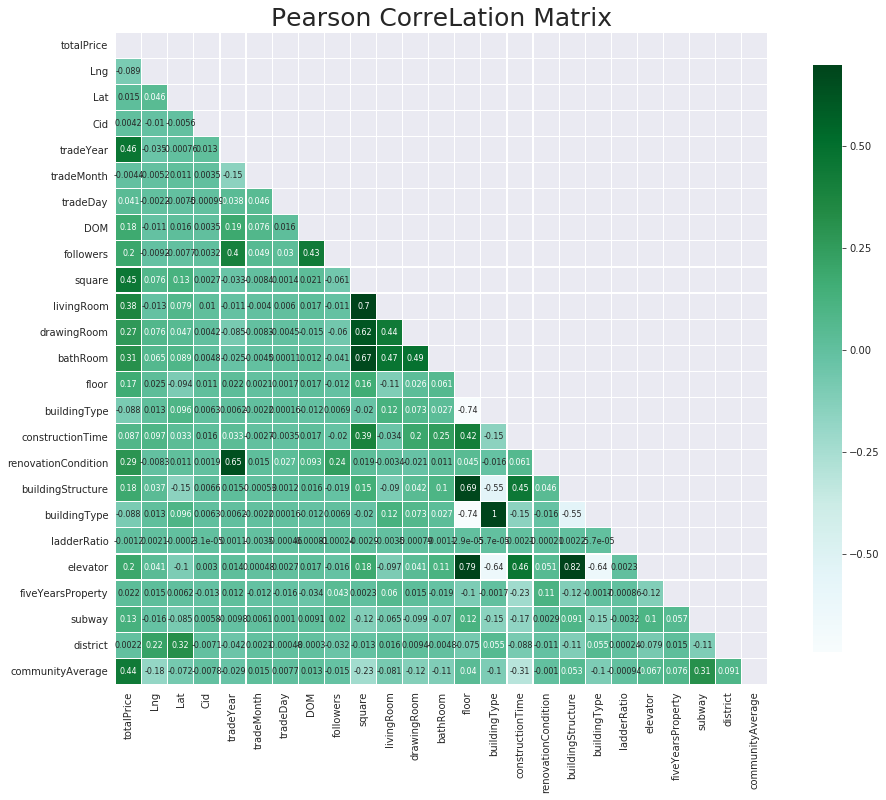

In [80]:
features = ['totalPrice','Lng','Lat','Cid','tradeYear','tradeMonth',
            'tradeDay','DOM','followers','square','livingRoom',
      'drawingRoom','bathRoom','floor','buildingType','constructionTime','renovationCondition',
            'buildingStructure','buildingType','ladderRatio','elevator','fiveYearsProperty','subway','district','communityAverage']

mask = np.zeros_like(df_hp_sub[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson CorreLation Matrix',fontsize=25)

sns.heatmap(df_hp_sub[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});
